In [1]:
%reset -f


In [3]:
from google.colab import drive
drive.mount('/content/drive')
!pip install rioxarray
!pip install cartopy


Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 77.1 MB/s eta 0:00:00


In [ ]:
#########
'ArcPy Prep for GCM delta ACCM, TMAX'
#########

import shutil
import os
import arcpy
import pandas as pd
import numpy as np


projDIR = r'C:\Users\afullhart\Documents\ArcGIS\Projects'
saveDIR = r'C:\Users\afullhart\Google Drive\Colab Notebooks\FigureTIFMaps'

gcmLabels = ['CCSM4', 'CanESM2', 'MIROC5']

ndays = [31, 28.25, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
ndaysw = [str(x/365.25) for x in ndays]
arcpy.env.overwriteOutput = True

for gcm in gcmLabels:

  gcmGDB = os.path.join(projDIR, gcm, gcm + '.gdb')
  print(gcmGDB)
  arcpy.env.workspace = gcmGDB

  outputCoordinateSystem = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]'
  parallelProcessingFactor = '5'
  extent = '-121.0 30.0 -102.0 43.0 GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]'

  with arcpy.EnvManager(outputCoordinateSystem=outputCoordinateSystem, extent=extent, parallelProcessingFactor=parallelProcessingFactor):

    output_raster = arcpy.sa.RasterCalculator(
      rasters=['accm_1974_2013/Band_1', 'accm_1974_2013/Band_2', 'accm_1974_2013/Band_3', 'accm_1974_2013/Band_4', 'accm_1974_2013/Band_5', 'accm_1974_2013/Band_6', 'accm_1974_2013/Band_7', 'accm_1974_2013/Band_8', 'accm_1974_2013/Band_9', 'accm_1974_2013/Band_10', 'accm_1974_2013/Band_11', 'accm_1974_2013/Band_12', 'accm_2070_2099/Band_1', 'accm_2070_2099/Band_2', 'accm_2070_2099/Band_3', 'accm_2070_2099/Band_4', 'accm_2070_2099/Band_5', 'accm_2070_2099/Band_6', 'accm_2070_2099/Band_7', 'accm_2070_2099/Band_8', 'accm_2070_2099/Band_9', 'accm_2070_2099/Band_10', 'accm_2070_2099/Band_11', 'accm_2070_2099/Band_12'],
      input_names=['accm1', 'accm2', 'accm3', 'accm4', 'accm5', 'accm6', 'accm7', 'accm8', 'accm9', 'accm10', 'accm11', 'accm12', 'accm1f', 'accm2f', 'accm3f', 'accm4f', 'accm5f', 'accm6f', 'accm7f', 'accm8f', 'accm9f', 'accm10f', 'accm11f', 'accm12f'],
      expression='Con(IsNull(accm1), accm1, (accm1f + accm2f + accm3f + accm4f + accm5f + accm6f + accm7f + accm8f + accm9f + accm10f + accm11f + accm12f) - (accm1 + accm2 + accm3 + accm4 + accm5 + accm6 + accm7 + accm8 + accm9 + accm10 + accm11 + accm12))'
    )

  output_raster.save(os.path.join(saveDIR, 'accm_delta_' + gcm + '.tif'))

  with arcpy.EnvManager(outputCoordinateSystem=outputCoordinateSystem, extent=extent, parallelProcessingFactor=parallelProcessingFactor):

    output_raster = arcpy.sa.RasterCalculator(
      rasters=['tmax_1974_2013/Band_1', 'tmax_1974_2013/Band_2', 'tmax_1974_2013/Band_3', 'tmax_1974_2013/Band_4', 'tmax_1974_2013/Band_5', 'tmax_1974_2013/Band_6', 'tmax_1974_2013/Band_7', 'tmax_1974_2013/Band_8', 'tmax_1974_2013/Band_9', 'tmax_1974_2013/Band_10', 'tmax_1974_2013/Band_11', 'tmax_1974_2013/Band_12', 'tmax_2070_2099/Band_1', 'tmax_2070_2099/Band_2', 'tmax_2070_2099/Band_3', 'tmax_2070_2099/Band_4', 'tmax_2070_2099/Band_5', 'tmax_2070_2099/Band_6', 'tmax_2070_2099/Band_7', 'tmax_2070_2099/Band_8', 'tmax_2070_2099/Band_9', 'tmax_2070_2099/Band_10', 'tmax_2070_2099/Band_11', 'tmax_2070_2099/Band_12'],
      input_names=['tmax1', 'tmax2', 'tmax3', 'tmax4', 'tmax5', 'tmax6', 'tmax7', 'tmax8', 'tmax9', 'tmax10', 'tmax11', 'tmax12', 'tmax1f', 'tmax2f', 'tmax3f', 'tmax4f', 'tmax5f', 'tmax6f', 'tmax7f', 'tmax8f', 'tmax9f', 'tmax10f', 'tmax11f', 'tmax12f'],
      expression='Con(IsNull(tmax1), tmax1, (tmax1f*{} + tmax2f*{} + tmax3f*{} + tmax4f*{} + tmax5f*{} + tmax6f*{} + tmax7f*{} + tmax8f*{} + tmax9f*{} + tmax10f*{} + tmax11f*{} + tmax12f*{}) - (tmax1*{} + tmax2*{} + tmax3*{} + tmax4*{} + tmax5*{} + tmax6*{} + tmax7*{} + tmax8*{} + tmax9*{} + tmax10*{} + tmax11*{} + tmax12*{}))'.format(ndaysw[0], ndaysw[1], ndaysw[2], ndaysw[3], ndaysw[4], ndaysw[5], ndaysw[6], ndaysw[7], ndaysw[8], ndaysw[9], ndaysw[10], ndaysw[11], ndaysw[0], ndaysw[1], ndaysw[2], ndaysw[3], ndaysw[4], ndaysw[5], ndaysw[6], ndaysw[7], ndaysw[8], ndaysw[9], ndaysw[10], ndaysw[11])
    )

  output_raster.save(os.path.join(saveDIR, 'tmax_delta_' + gcm + '.tif'))






ModuleNotFoundError: No module named 'arcpy'

In [ ]:
%reset -f


brgr_r <matplotlib.colors.LinearSegmentedColormap object at 0x7982453b88c0>
[[0.32941176 0.18823529 0.01960784 1.        ]
 [0.74901961 0.50588235 0.17647059 1.        ]
 [1.         1.         1.         1.        ]
 [0.50196078 0.80392157 0.75686275 1.        ]
 [0.20784314 0.59215686 0.56078431 1.        ]
 [0.00392157 0.4        0.36862745 1.        ]
 [0.         0.23529412 0.18823529 1.        ]]


/tmp/ipython-input-3853294470.py:125: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  magma = mpl.cm.get_cmap(cmap_str)


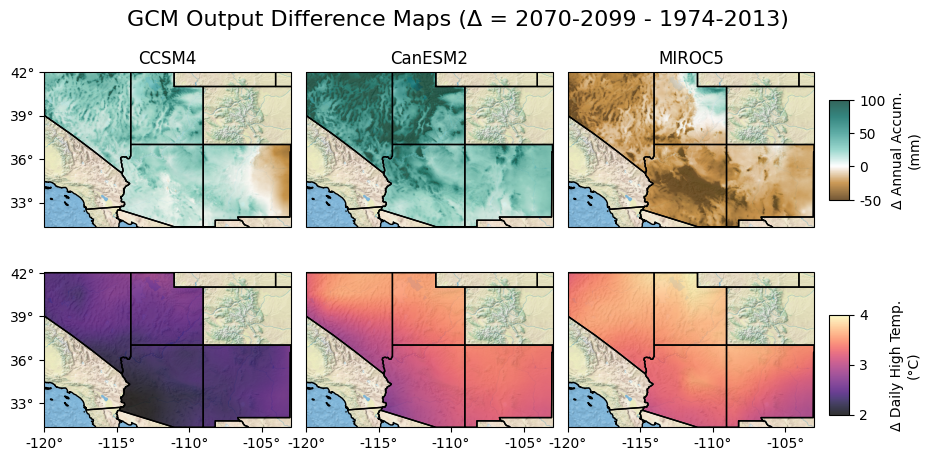

In [6]:
#######
'Requires https://www.naturalearthdata.com/downloads/10m-raster-data/10m-natural-earth-1/'
#######

import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import os
import rioxarray as xr
import cartopy.crs as ccrs
import cartopy
from matplotlib.image import imread
import matplotlib as mpl
import PIL
PIL.Image.MAX_IMAGE_PIXELS = None

accmCCSM4tif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/accm_delta_CCSM4.tif'
tmaxCCSM4tif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/tmax_delta_CCSM4.tif'

accmCanESM2tif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/accm_delta_CanESM2.tif'
tmaxCanESM2tif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/tmax_delta_CanESM2.tif'

accmMIROC5tif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/accm_delta_MIROC5.tif'
tmaxMIROC5tif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/tmax_delta_MIROC5.tif'

fname = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/NE1_HR_LC_SR_W_DR.tif'
saveFILE = '/content/drive/My Drive/GEE_Downloads/Fig1.jpg'

dem = xr.open_rasterio(accmCCSM4tif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -1e9, np.nan)

fig, ax = plt.subplots(2, 3, figsize=(8, 5), subplot_kw={'projection': ccrs.PlateCarree()})
fig.tight_layout()
fig.suptitle('        GCM Output Difference Maps (Δ = 2070-2099 - 1974-2013)', size=16, fontstyle='normal')

# cmap_str = 'viridis_r'
# cividis_r = mpl.cm.get_cmap(cmap_str)
# colors = cividis_r.colors
# colors = colors[::43][:2] + [[1.0, 1.0, 1.0]] + colors[::43][2:]
# cmap = mpl.colors.LinearSegmentedColormap.from_list('custom_accm', colors)

cmap_str = 'BrBG'
brgr_r = mpl.colormaps.get_cmap(cmap_str)
print('brgr_r', brgr_r)

rgba_colors = np.array([channel[:, 1] for channel in brgr_r._segmentdata.values()])
colors = rgba_colors.T
colors = np.append(np.append(colors[:5:2][:2], [[1.0, 1.0, 1.0, 1.0]], axis=0), colors[5:][2:], axis=0)
cmap = mpl.colors.LinearSegmentedColormap.from_list('custom_accm', colors)

print(colors)
print(cmap)

ax[0,0].set_title('CCSM4')
ax[0,0].set_yticks([33, 36, 39, 42], crs=ccrs.PlateCarree())
ax[0,0].set_yticklabels(['33°', '36°', '39°', '42°'])
ax[0,0].set_extent([-120, -102.991, 31.333, 42.008])
ax[0,0].add_feature(cartopy.feature.STATES, linewidth=1)
ax[0,0].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
ax[0,0].imshow(dem,
           extent=[lon_min, lon_max, lat_min, lat_max],
           origin='upper',
           vmin=-50,
           vmax=100,
           alpha=0.80,
           cmap=cmap)

dem = xr.open_rasterio(accmCanESM2tif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -1e9, np.nan)

ax[0,1].set_title('CanESM2')
ax[0,1].set_extent([-120, -102.991, 31.333, 42.008])
ax[0,1].add_feature(cartopy.feature.STATES, linewidth=1)
ax[0,1].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
ax[0,1].imshow(dem,
           extent=[lon_min, lon_max, lat_min, lat_max],
           origin='upper',
           vmin=-50,
           vmax=100,
           alpha=0.80,
           cmap=cmap)

dem = xr.open_rasterio(accmMIROC5tif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -1e9, np.nan)

ax[0,2].set_title('MIROC5')
ax[0,2].set_extent([-120, -102.991, 31.333, 42.008])
ax[0,2].add_feature(cartopy.feature.STATES, linewidth=1)
ax[0,2].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])

im = ax[0,2].imshow(dem,
            extent=[lon_min, lon_max, lat_min, lat_max],
            origin='upper',
            vmin=-50,
            vmax=100,
            alpha=0.80,
           cmap=cmap)

cax = fig.add_axes([1.0, 0.6, 0.025, 0.2]) #[X, Y, WIDTH, HEIGHT]
cbar = fig.colorbar(im, cax=cax, orientation='vertical', label='Δ Annual Accum.\n(mm)')
cbar.set_ticks([-50, 0, 50, 100])
cbar.set_ticklabels(['-50', '0', '50', '100'])



cmap_str = 'magma'
magma = mpl.cm.get_cmap(cmap_str)
colors = magma.colors
cmap = mpl.colors.LinearSegmentedColormap.from_list('custom_tmax', colors)

dem = xr.open_rasterio(tmaxCCSM4tif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -1e9, np.nan)

ax[1,0].set_xticks([-105, -110, -115, -119.99], crs=ccrs.PlateCarree())
ax[1,0].set_xticklabels(['-105°', '-110°', '-115°', '-120°'])
ax[1,0].set_yticks([33, 36, 39, 42], crs=ccrs.PlateCarree())
ax[1,0].set_yticklabels(['33°', '36°', '39°', '42°'])
ax[1,0].set_extent([-120, -102.991, 31.333, 42.008])
ax[1,0].add_feature(cartopy.feature.STATES, linewidth=1)
ax[1,0].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
ax[1,0].imshow(dem,
           extent=[lon_min, lon_max, lat_min, lat_max],
           origin='upper',
           vmin=2,
           vmax=4,
           alpha=0.80,
           cmap=cmap)

dem = xr.open_rasterio(tmaxCanESM2tif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -1e9, np.nan)

ax[1,1].set_xticks([-105, -110, -115, -119.99], crs=ccrs.PlateCarree())
ax[1,1].set_xticklabels(['-105°', '-110°', '-115°', '-120°'])
ax[1,1].set_extent([-120, -102.991, 31.333, 42.008])
ax[1,1].add_feature(cartopy.feature.STATES, linewidth=1)
ax[1,1].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
ax[1,1].imshow(dem,
           extent=[lon_min, lon_max, lat_min, lat_max],
           origin='upper',
           vmin=2,
           vmax=4,
           alpha=0.80,
           cmap=cmap)

dem = xr.open_rasterio(tmaxMIROC5tif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -1e9, np.nan)

ax[1,2].set_xticks([-105, -110, -115, -119.99], crs=ccrs.PlateCarree())
ax[1,2].set_xticklabels(['-105°', '-110°', '-115°', '-120°'])
ax[1,2].set_extent([-120, -102.991, 31.333, 42.008])
ax[1,2].add_feature(cartopy.feature.STATES, linewidth=1)
ax[1,2].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
im2 = ax[1, 2].imshow(dem,
           extent=[lon_min, lon_max, lat_min, lat_max],
           origin='upper',
           vmin=2,
           vmax=4,
           alpha=0.80,
           cmap=cmap)

cax = fig.add_axes([1.0, 0.17, 0.025, 0.2]) #[X, Y, WIDTH, HEIGHT]
cbar = fig.colorbar(im2, cax=cax, orientation='vertical', label='\nΔ Daily High Temp.\n(°C)')
cbar.set_ticks([2, 3, 4])
cbar.set_ticklabels(['2', '3', '4'])

fig.savefig(saveFILE, dpi=600, bbox_inches='tight')




In [ ]:
#########
'ArcPy Prep for delta Ndays'
#########

import shutil
import os
import arcpy
import pandas as pd
import numpy as np


gdbDIR = r'C:\Users\afullhart\Documents\ArcGIS\Projects\CCSM4\CCSM4.gdb'
saveDIR = r'C:\Users\afullhart\Google Drive\Colab Notebooks\FigureTIFMaps'

arcpy.env.overwriteOutput = True
arcpy.env.workspace = gdbDIR

ndays = [31, 28.25, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
ndaysw = [str(x/365.25) for x in ndays]



outputCoordinateSystem = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]'
parallelProcessingFactor = '5'
extent = '-121.0 30.0 -102.0 43.0 GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]'

with arcpy.EnvManager(outputCoordinateSystem=outputCoordinateSystem, extent=extent, parallelProcessingFactor=parallelProcessingFactor):

  output_raster = arcpy.sa.RasterCalculator(
    rasters=['accm_1974_2013/Band_1', 'accm_1974_2013/Band_2', 'accm_1974_2013/Band_3', 'accm_1974_2013/Band_4', 'accm_1974_2013/Band_5', 'accm_1974_2013/Band_6', 'accm_1974_2013/Band_7', 'accm_1974_2013/Band_8', 'accm_1974_2013/Band_9', 'accm_1974_2013/Band_10', 'accm_1974_2013/Band_11', 'accm_1974_2013/Band_12', 'mean_1974_2013/Band_1', 'mean_1974_2013/Band_2', 'mean_1974_2013/Band_3', 'mean_1974_2013/Band_4', 'mean_1974_2013/Band_5', 'mean_1974_2013/Band_6', 'mean_1974_2013/Band_7', 'mean_1974_2013/Band_8', 'mean_1974_2013/Band_9', 'mean_1974_2013/Band_10', 'mean_1974_2013/Band_11', 'mean_1974_2013/Band_12'],
    input_names=['accm1', 'accm2', 'accm3', 'accm4', 'accm5', 'accm6', 'accm7', 'accm8', 'accm9', 'accm10', 'accm11', 'accm12', 'mean1', 'mean2', 'mean3', 'mean4', 'mean5', 'mean6', 'mean7', 'mean8', 'mean9', 'mean10', 'mean11', 'mean12'],
    expression='Con(IsNull(accm1), accm1, accm1/25.4/mean1 + accm2/25.4/mean2 + accm3/25.4/mean3 + accm4/25.4/mean4 + accm5/25.4/mean5 + accm6/25.4/mean6 + accm7/25.4/mean7 + accm8/25.4/mean8 + accm9/25.4/mean9 + accm10/25.4/mean10 + accm11/25.4/mean11 + accm12/25.4/mean12)'
  )

output_raster.save(os.path.join(saveDIR, 'ndays.tif'))

ndays_raster = arcpy.Raster(os.path.join(saveDIR, 'ndays.tif'))

with arcpy.EnvManager(outputCoordinateSystem=outputCoordinateSystem, extent=extent, parallelProcessingFactor=parallelProcessingFactor):

  output_raster = arcpy.sa.RasterCalculator(
    rasters=[ndays_raster, 'accm_2070_2099/Band_1', 'accm_2070_2099/Band_2', 'accm_2070_2099/Band_3', 'accm_2070_2099/Band_4', 'accm_2070_2099/Band_5', 'accm_2070_2099/Band_6', 'accm_2070_2099/Band_7', 'accm_2070_2099/Band_8', 'accm_2070_2099/Band_9', 'accm_2070_2099/Band_10', 'accm_2070_2099/Band_11', 'accm_2070_2099/Band_12', 'mean_1974_2013/Band_1', 'mean_1974_2013/Band_2', 'mean_1974_2013/Band_3', 'mean_1974_2013/Band_4', 'mean_1974_2013/Band_5', 'mean_1974_2013/Band_6', 'mean_1974_2013/Band_7', 'mean_1974_2013/Band_8', 'mean_1974_2013/Band_9', 'mean_1974_2013/Band_10', 'mean_1974_2013/Band_11', 'mean_1974_2013/Band_12'],
    input_names=['ndays', 'accm1', 'accm2', 'accm3', 'accm4', 'accm5', 'accm6', 'accm7', 'accm8', 'accm9', 'accm10', 'accm11', 'accm12', 'mean1', 'mean2', 'mean3', 'mean4', 'mean5', 'mean6', 'mean7', 'mean8', 'mean9', 'mean10', 'mean11', 'mean12'],
    expression='Con(IsNull(accm1), accm1, (accm1/25.4/mean1 + accm2/25.4/mean2 + accm3/25.4/mean3 + accm4/25.4/mean4 + accm5/25.4/mean5 + accm6/25.4/mean6 + accm7/25.4/mean7 + accm8/25.4/mean8 + accm9/25.4/mean9 + accm10/25.4/mean10 + accm11/25.4/mean11 + accm12/25.4/mean12) - ndays)'
  )

output_raster.save(os.path.join(saveDIR, 'ndays_delta.tif'))



ModuleNotFoundError: No module named 'arcpy'

In [ ]:
#########
'ArcPy Prep for delta MX.5P'
#########

import shutil
import os
import arcpy
import pandas as pd
import numpy as np


gdbDIR = r'C:\Users\afullhart\Documents\ArcGIS\Projects\CCSM4\CCSM4.gdb'
saveDIR = r'C:\Users\afullhart\Google Drive\Colab Notebooks\FigureTIFMaps'

arcpy.env.overwriteOutput = True
arcpy.env.workspace = gdbDIR

mx5p_raster = arcpy.Raster('mx5p_1974_2013/Band_8')
mx5pf_raster = arcpy.Raster('mx5p_2070_2099/Band_8')

outputCoordinateSystem = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]'
parallelProcessingFactor = '5'
extent = '-121.0 30.0 -102.0 43.0 GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]'

with arcpy.EnvManager(outputCoordinateSystem=outputCoordinateSystem, extent=extent, parallelProcessingFactor=parallelProcessingFactor):

  output_raster = arcpy.sa.RasterCalculator(
    rasters=[mx5p_raster],
    input_names=['mx5p'],
    expression='Con(IsNull(mx5p), mx5p, mx5p*25.4)'
  )

output_raster.save(os.path.join(saveDIR, 'mx5p.tif'))

with arcpy.EnvManager(outputCoordinateSystem=outputCoordinateSystem, extent=extent, parallelProcessingFactor=parallelProcessingFactor):

  output_raster = arcpy.sa.RasterCalculator(
    rasters=[mx5p_raster, mx5pf_raster],
    input_names=['mx5p', 'mx5pf'],
    expression='Con(IsNull(mx5p), mx5p, mx5pf*25.4 - mx5p*25.4)'
  )

output_raster.save(os.path.join(saveDIR, 'mx5p_delta.tif'))




ModuleNotFoundError: No module named 'arcpy'

In [ ]:
%reset -f

<ipython-input-4-84f7a5d3e3e5>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cividis_r = mpl.cm.get_cmap(cmap_str)
<ipython-input-4-84f7a5d3e3e5>:115: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cividis_r = mpl.cm.get_cmap(cmap_str)


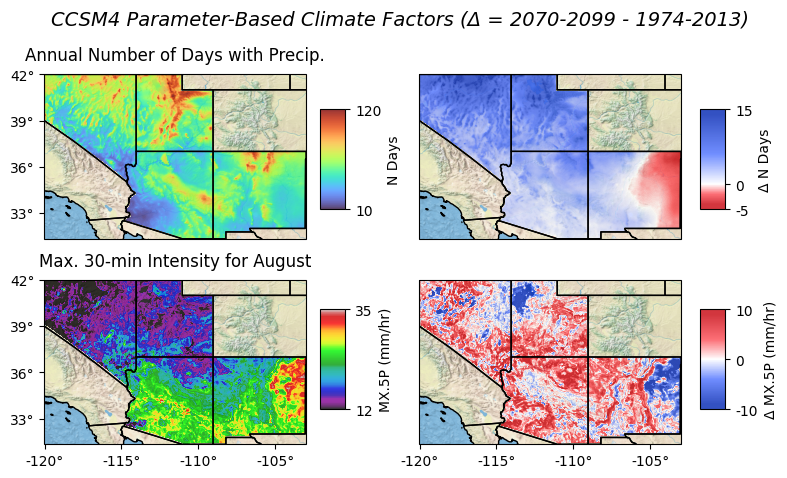

In [ ]:
import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import os
import rioxarray as xr
import cartopy.crs as ccrs
import cartopy
from matplotlib.image import imread
import matplotlib as mpl
import PIL
PIL.Image.MAX_IMAGE_PIXELS = None

ndaystif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/ndays.tif'
ndaysdeltatif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/ndays_delta.tif'
mx5ptif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/mx5p.tif'
mx5pdeltatif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/mx5p_delta.tif'
saveFILE = '/content/drive/My Drive/GEE_Downloads/Fig_ParBasedFactors.jpg'

fname = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/NE1_HR_LC_SR_W_DR.tif'


dem = xr.open_rasterio(ndaystif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -999e3, np.nan)

fig, ax = plt.subplots(2, 2, figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.25, hspace=0.25, top=0.85, right=0.8)
fig.suptitle('CCSM4 Parameter-Based Climate Factors (Δ = 2070-2099 - 1974-2013)', size=14, fontstyle='oblique')



cmap_str = 'turbo'
cividis_r = mpl.cm.get_cmap(cmap_str)
colors = cividis_r.colors
cmap = mpl.colors.LinearSegmentedColormap.from_list('custom_accm', colors)

ax[0,0].set_title('Annual Number of Days with Precip.', pad=10)
ax[0,0].set_yticks([33, 36, 39, 42], crs=ccrs.PlateCarree())
ax[0,0].set_yticklabels(['33°', '36°', '39°', '42°'])
ax[0,0].set_extent([-120, -102.991, 31.333, 42.008])
ax[0,0].add_feature(cartopy.feature.STATES, linewidth=1)
ax[0,0].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
im = ax[0,0].imshow(dem,
            extent=[lon_min, lon_max, lat_min, lat_max],
            origin='upper',
            vmin=10,
            vmax=120,
            alpha=0.80,
            cmap=cmap)

cax = fig.add_axes([0.42, 0.58, 0.025, 0.2]) #[X, Y, WIDTH, HEIGHT]
cbar = fig.colorbar(im, cax=cax, orientation='vertical', label='N Days')
cbar.set_ticks([10, 120])
cbar.set_ticklabels(['10', '120'])






dem = xr.open_rasterio(ndaysdeltatif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -1e9, np.nan)

cmap = mpl.colors.LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#5:C7030D-15:FC4A53-25:FFFFFF-55.5:4C71FF-95:0025B3
    (0.000, (0.780, 0.012, 0.051)),
    (0.050, (0.780, 0.012, 0.051)),
    (0.150, (0.988, 0.290, 0.325)),
    (0.250, (1.000, 1.000, 1.000)),
    (0.555, (0.298, 0.443, 1.000)),
    (0.950, (0.000, 0.145, 0.702)),
    (1.000, (0.000, 0.145, 0.702))))

ax[0,1].set_extent([-120, -102.991, 31.333, 42.008])
ax[0,1].add_feature(cartopy.feature.STATES, linewidth=1)
ax[0,1].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
im = ax[0,1].imshow(dem,
           extent=[lon_min, lon_max, lat_min, lat_max],
           origin='upper',
           vmin=-5,
           vmax=15,
           alpha=0.80,
           cmap=cmap)

cax = fig.add_axes([0.8, 0.58, 0.025, 0.2]) #[X, Y, WIDTH, HEIGHT]
cbar = fig.colorbar(im, cax=cax, orientation='vertical', label='Δ N Days')
cbar.set_ticks([-5, 0, 15])
cbar.set_ticklabels(['-5', '0', '15'])






dem = xr.open_rasterio(mx5ptif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -1e9, np.nan)

cmap_str = 'nipy_spectral'
cividis_r = mpl.cm.get_cmap(cmap_str)
colors = cividis_r(np.linspace(0, 1, 30))
cmap = mpl.colors.LinearSegmentedColormap.from_list('custom_accm', colors)

ax[1,0].set_title('Max. 30-min Intensity for August', pad=10)
ax[1,0].set_yticks([33, 36, 39, 42], crs=ccrs.PlateCarree())
ax[1,0].set_yticklabels(['33°', '36°', '39°', '42°'])
ax[1,0].set_xticks([-105, -110, -115, -119.99], crs=ccrs.PlateCarree())
ax[1,0].set_xticklabels(['-105°', '-110°', '-115°', '-120°'])
ax[1,0].set_extent([-120, -102.991, 31.333, 42.008])
ax[1,0].add_feature(cartopy.feature.STATES, linewidth=1)
ax[1,0].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
im = ax[1,0].imshow(dem,
            extent=[lon_min, lon_max, lat_min, lat_max],
            origin='upper',
            vmin=12,
            vmax=35,
            alpha=0.80,
            cmap=cmap)

cax = fig.add_axes([0.42, 0.18, 0.025, 0.2]) #[X, Y, WIDTH, HEIGHT]
cbar = fig.colorbar(im, cax=cax, orientation='vertical', label='MX.5P (mm/hr)')
cbar.set_ticks([12, 35])
cbar.set_ticklabels(['12', '35'])






dem = xr.open_rasterio(mx5pdeltatif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -999e3, np.nan)

cmap = mpl.colors.LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#5:0025B3-30:4C71FF-50:FFFFFF-70:FC4A53-95:C7030D
    (0.000, (0.000, 0.145, 0.702)),
    (0.050, (0.000, 0.145, 0.702)),
    (0.300, (0.298, 0.443, 1.000)),
    (0.500, (1.000, 1.000, 1.000)),
    (0.700, (0.988, 0.290, 0.325)),
    (0.950, (0.780, 0.012, 0.051)),
    (1.000, (0.780, 0.012, 0.051))))

ax[1,1].set_xticks([-105, -110, -115, -119.99], crs=ccrs.PlateCarree())
ax[1,1].set_xticklabels(['-105°', '-110°', '-115°', '-120°'])
ax[1,1].set_extent([-120, -102.991, 31.333, 42.008])
ax[1,1].add_feature(cartopy.feature.STATES, linewidth=1)
ax[1,1].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
im = ax[1,1].imshow(dem,
            extent=[lon_min, lon_max, lat_min, lat_max],
            origin='upper',
            vmin=-10,
            vmax=10,
            alpha=0.80,
            cmap=cmap)

cax = fig.add_axes([0.8, 0.18, 0.025, 0.2]) #[X, Y, WIDTH, HEIGHT]
cbar = fig.colorbar(im, cax=cax, orientation='vertical', label='Δ MX.5P (mm/hr)')
cbar.set_ticks([-10, 0, 10])
cbar.set_ticklabels(['-10', '0', '10'])


fig.savefig(saveFILE, dpi=600, bbox_inches='tight')



In [ ]:
%reset -f

<ipython-input-23-321f290afa07>:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cividis_r = mpl.cm.get_cmap(cmap_str)


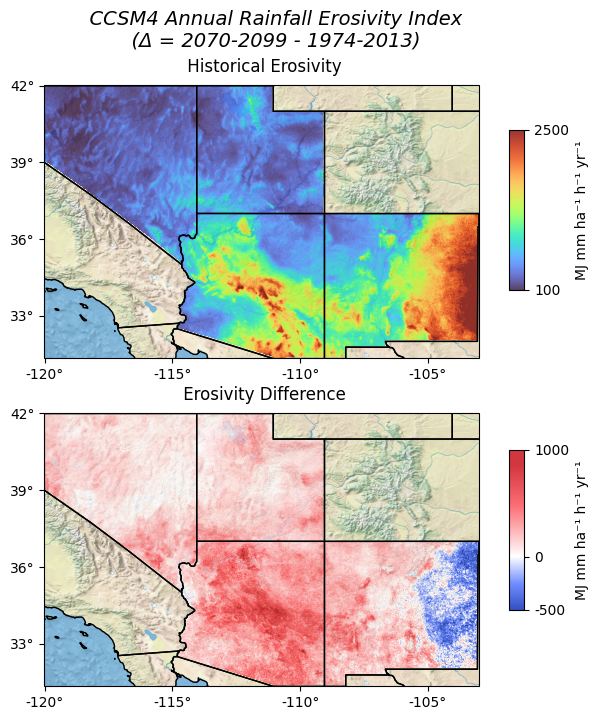

In [ ]:

import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import os
import rioxarray as xr
import cartopy.crs as ccrs
import cartopy
from matplotlib.image import imread
import matplotlib as mpl
import PIL
PIL.Image.MAX_IMAGE_PIXELS = None

erotif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/Ero.tif'
erodeltatif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/Ero_Diff.tif'
saveFILE = '/content/drive/My Drive/GEE_Downloads/Fig_Erosivity.jpg'

fname = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/NE1_HR_LC_SR_W_DR.tif'


dem = xr.open_rasterio(erotif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -999e3, np.nan)


fig, ax = plt.subplots(2, 1, figsize=(6, 8), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.05, hspace=0.05, top=0.91, right=0.85)
fig.suptitle('  CCSM4 Annual Rainfall Erosivity Index\n  (Δ = 2070-2099 - 1974-2013)', size=14, fontstyle='oblique')


cmap_str = 'turbo'
cividis_r = mpl.cm.get_cmap(cmap_str)
cmap = cividis_r

ax[0].set_title(' Historical Erosivity', pad=10)
ax[0].set_xticks([-105, -110, -115, -119.99], crs=ccrs.PlateCarree())
ax[0].set_xticklabels(['-105°', '-110°', '-115°', '-120°'])
ax[0].set_yticks([33, 36, 39, 42], crs=ccrs.PlateCarree())
ax[0].set_yticklabels(['33°', '36°', '39°', '42°'])
ax[0].set_extent([-120, -102.991, 31.333, 42.008])
ax[0].add_feature(cartopy.feature.STATES, linewidth=1)
ax[0].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
im = ax[0].imshow(dem,
            extent=[lon_min, lon_max, lat_min, lat_max],
            origin='upper',
            vmin=100,
            vmax=2500,
            alpha=0.80,
            cmap=cmap)

cax = fig.add_axes([0.9, 0.63, 0.025, 0.2]) #[X, Y, WIDTH, HEIGHT]
cbar = fig.colorbar(im, cax=cax, orientation='vertical', label='MJ mm ha⁻¹ h⁻¹ yr⁻¹')
cbar.set_ticks([100, 2500])
cbar.set_ticklabels(['100', '2500'])






dem = xr.open_rasterio(erodeltatif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -999e3, np.nan)


cmap = mpl.colors.LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:0025B3-16.2:4C71FF-33.3:FFFFFF-65:FC4A53-90.9:C7030D
    (0.000, (0.000, 0.145, 0.702)),
    (0.162, (0.298, 0.443, 1.000)),
    (0.333, (1.000, 1.000, 1.000)),
    (0.650, (0.988, 0.290, 0.325)),
    (0.909, (0.780, 0.012, 0.051)),
    (1.000, (0.780, 0.012, 0.051))))

ax[1].set_title(' Erosivity Difference', pad=10)
ax[1].set_xticks([-105, -110, -115, -119.99], crs=ccrs.PlateCarree())
ax[1].set_xticklabels(['-105°', '-110°', '-115°', '-120°'])
ax[1].set_yticks([33, 36, 39, 42], crs=ccrs.PlateCarree())
ax[1].set_yticklabels(['33°', '36°', '39°', '42°'])
ax[1].set_extent([-120, -102.991, 31.333, 42.008])
ax[1].add_feature(cartopy.feature.STATES, linewidth=1)
ax[1].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
im = ax[1].imshow(dem,
           extent=[lon_min, lon_max, lat_min, lat_max],
           origin='upper',
           vmin=-500,
           vmax=1000,
           alpha=0.80,
           cmap=cmap)

cax = fig.add_axes([0.9, 0.23, 0.025, 0.2]) #[X, Y, WIDTH, HEIGHT]
cbar = fig.colorbar(im, cax=cax, orientation='vertical', label='MJ mm ha⁻¹ h⁻¹ yr⁻¹')
cbar.set_ticks([-500, 0, 1000])
cbar.set_ticklabels(['-500', '0', '1000'])

fig.savefig(saveFILE, dpi=600, bbox_inches='tight')





In [ ]:
%reset -f

<ipython-input-20-869580671f47>:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cividis_r = mpl.cm.get_cmap(cmap_str)


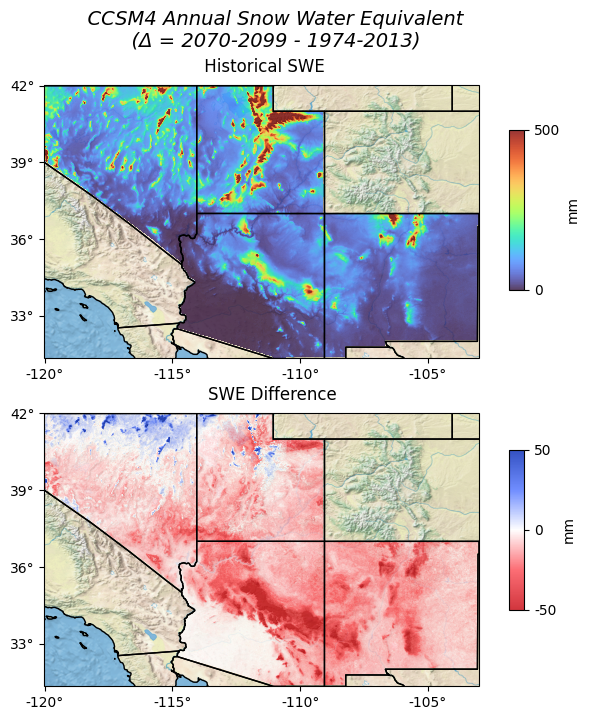

In [ ]:

import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import os
import rioxarray as xr
import cartopy.crs as ccrs
import cartopy
from matplotlib.image import imread
import matplotlib as mpl
import PIL
PIL.Image.MAX_IMAGE_PIXELS = None

erotif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/SWE.tif'
erodeltatif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/SWE_Diff.tif'
saveFILE = '/content/drive/My Drive/GEE_Downloads/Fig_SWE.jpg'

fname = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/NE1_HR_LC_SR_W_DR.tif'


dem = xr.open_rasterio(erotif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -999e3, np.nan)


fig, ax = plt.subplots(2, 1, figsize=(6, 8), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.05, hspace=0.05, top=0.91, right=0.85)
fig.suptitle('  CCSM4 Annual Snow Water Equivalent\n  (Δ = 2070-2099 - 1974-2013)', size=14, fontstyle='oblique')


cmap_str = 'turbo'
cividis_r = mpl.cm.get_cmap(cmap_str)
cmap = cividis_r

ax[0].set_title(' Historical SWE', pad=10)
ax[0].set_xticks([-105, -110, -115, -119.99], crs=ccrs.PlateCarree())
ax[0].set_xticklabels(['-105°', '-110°', '-115°', '-120°'])
ax[0].set_yticks([33, 36, 39, 42], crs=ccrs.PlateCarree())
ax[0].set_yticklabels(['33°', '36°', '39°', '42°'])
ax[0].set_extent([-120, -102.991, 31.333, 42.008])
ax[0].add_feature(cartopy.feature.STATES, linewidth=1)
ax[0].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
im = ax[0].imshow(dem,
            extent=[lon_min, lon_max, lat_min, lat_max],
            origin='upper',
            vmin=0,
            vmax=500,
            alpha=0.80,
            cmap=cmap)

cax = fig.add_axes([0.9, 0.63, 0.025, 0.2]) #[X, Y, WIDTH, HEIGHT]
cbar = fig.colorbar(im, cax=cax, orientation='vertical', label='mm')
cbar.set_ticks([0, 500])
cbar.set_ticklabels(['0', '500'])






dem = xr.open_rasterio(erodeltatif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -999e3, np.nan)


cmap = mpl.colors.LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:C7030D-25:FC4A53-50:FFFFFF-75:4C71FF-100:0025B3
    (0.000, (0.780, 0.012, 0.051)),
    (0.250, (0.988, 0.290, 0.325)),
    (0.500, (1.000, 1.000, 1.000)),
    (0.750, (0.298, 0.443, 1.000)),
    (1.000, (0.000, 0.145, 0.702))))

ax[1].set_title('    SWE Difference', pad=10)
ax[1].set_xticks([-105, -110, -115, -119.99], crs=ccrs.PlateCarree())
ax[1].set_xticklabels(['-105°', '-110°', '-115°', '-120°'])
ax[1].set_yticks([33, 36, 39, 42], crs=ccrs.PlateCarree())
ax[1].set_yticklabels(['33°', '36°', '39°', '42°'])
ax[1].set_extent([-120, -102.991, 31.333, 42.008])
ax[1].add_feature(cartopy.feature.STATES, linewidth=1)
ax[1].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
im = ax[1].imshow(dem,
           extent=[lon_min, lon_max, lat_min, lat_max],
           origin='upper',
           vmin=-50,
           vmax=50,
           alpha=0.80,
           cmap=cmap)

cax = fig.add_axes([0.9, 0.23, 0.025, 0.2]) #[X, Y, WIDTH, HEIGHT]
cbar = fig.colorbar(im, cax=cax, orientation='vertical', label='mm')
cbar.set_ticks([-50, 0, 50])
cbar.set_ticklabels(['-50', '0', '50'])

fig.savefig(saveFILE, dpi=600, bbox_inches='tight')



In [ ]:
%reset -f


<ipython-input-24-9a2791c717c8>:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cividis_r = mpl.cm.get_cmap(cmap_str)
<ipython-input-24-9a2791c717c8>:112: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cividis_r = mpl.cm.get_cmap(cmap_str)


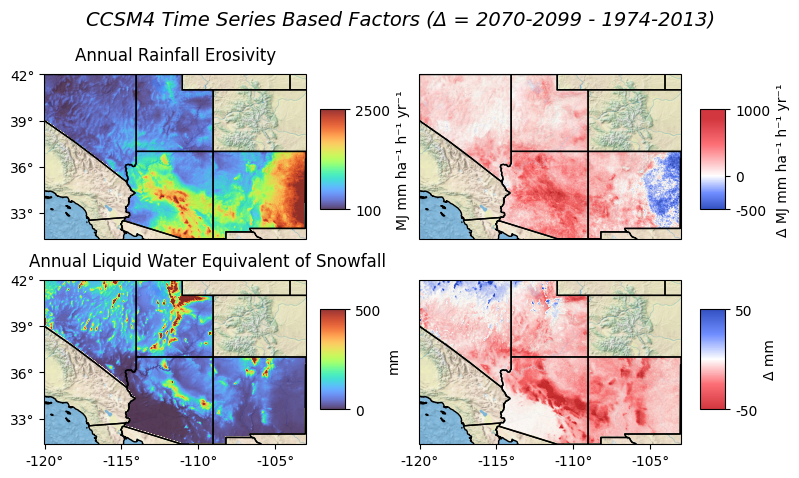

In [ ]:
import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import os
import rioxarray as xr
import cartopy.crs as ccrs
import cartopy
from matplotlib.image import imread
import matplotlib as mpl
import PIL
PIL.Image.MAX_IMAGE_PIXELS = None

erotif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/Ero.tif'
erodeltatif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/Ero_Diff.tif'
swetif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/SWE.tif'
swedeltatif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/SWE_Diff.tif'
saveFILE = '/content/drive/My Drive/GEE_Downloads/Fig_TseriesBasedFactors.jpg'

fname = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/NE1_HR_LC_SR_W_DR.tif'


dem = xr.open_rasterio(erotif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -999e3, np.nan)

fig, ax = plt.subplots(2, 2, figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.25, hspace=0.25, top=0.85, right=0.8)

fig.suptitle('CCSM4 Time Series Based Factors (Δ = 2070-2099 - 1974-2013)', size=14, fontstyle='oblique')

cmap_str = 'turbo'
cividis_r = mpl.cm.get_cmap(cmap_str)
cmap = cividis_r


ax[0,0].set_title('Annual Rainfall Erosivity', pad=10)
ax[0,0].set_yticks([33, 36, 39, 42], crs=ccrs.PlateCarree())
ax[0,0].set_yticklabels(['33°', '36°', '39°', '42°'])
ax[0,0].set_extent([-120, -102.991, 31.333, 42.008])
ax[0,0].add_feature(cartopy.feature.STATES, linewidth=1)
ax[0,0].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
im = ax[0,0].imshow(dem,
            extent=[lon_min, lon_max, lat_min, lat_max],
            origin='upper',
            vmin=100,
            vmax=2500,
            alpha=0.80,
            cmap=cmap)

cax = fig.add_axes([0.42, 0.58, 0.025, 0.2]) #[X, Y, WIDTH, HEIGHT]
cbar = fig.colorbar(im, cax=cax, orientation='vertical', label='MJ mm ha⁻¹ h⁻¹ yr⁻¹')
cbar.set_ticks([100, 2500])
cbar.set_ticklabels(['100', '2500'])





dem = xr.open_rasterio(erodeltatif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -999e3, np.nan)

cmap = mpl.colors.LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:0025B3-16.2:4C71FF-33.3:FFFFFF-65:FC4A53-90.9:C7030D
    (0.000, (0.000, 0.145, 0.702)),
    (0.162, (0.298, 0.443, 1.000)),
    (0.333, (1.000, 1.000, 1.000)),
    (0.650, (0.988, 0.290, 0.325)),
    (0.909, (0.780, 0.012, 0.051)),
    (1.000, (0.780, 0.012, 0.051))))


ax[0,1].set_extent([-120, -102.991, 31.333, 42.008])
ax[0,1].add_feature(cartopy.feature.STATES, linewidth=1)
ax[0,1].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
im = ax[0,1].imshow(dem,
           extent=[lon_min, lon_max, lat_min, lat_max],
           origin='upper',
           vmin=-500,
           vmax=1000,
           alpha=0.80,
           cmap=cmap)

cax = fig.add_axes([0.8, 0.58, 0.025, 0.2]) #[X, Y, WIDTH, HEIGHT]
cbar = fig.colorbar(im, cax=cax, orientation='vertical', label='Δ MJ mm ha⁻¹ h⁻¹ yr⁻¹')
cbar.set_ticks([-500, 0, 1000])
cbar.set_ticklabels(['-500', '0', '1000'])





dem = xr.open_rasterio(swetif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -999e3, np.nan)

cmap_str = 'turbo'
cividis_r = mpl.cm.get_cmap(cmap_str)
cmap = cividis_r

ax[1,0].text(-121, 42.9, 'Annual Liquid Water Equivalent of Snowfall', size=12)
ax[1,0].set_title('Annual Liquid Water Equivalent of Snowfall', size=0, c='white', pad=10)
ax[1,0].set_yticks([33, 36, 39, 42], crs=ccrs.PlateCarree())
ax[1,0].set_yticklabels(['33°', '36°', '39°', '42°'])
ax[1,0].set_xticks([-105, -110, -115, -119.99], crs=ccrs.PlateCarree())
ax[1,0].set_xticklabels(['-105°', '-110°', '-115°', '-120°'])
ax[1,0].set_extent([-120, -102.991, 31.333, 42.008])
ax[1,0].add_feature(cartopy.feature.STATES, linewidth=1)
ax[1,0].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
im = ax[1,0].imshow(dem,
            extent=[lon_min, lon_max, lat_min, lat_max],
            origin='upper',
            vmin=0,
            vmax=500,
            alpha=0.80,
            cmap=cmap)

cax = fig.add_axes([0.42, 0.18, 0.025, 0.2]) #[X, Y, WIDTH, HEIGHT]
cbar = fig.colorbar(im, cax=cax, orientation='vertical', label='mm')
cbar.set_ticks([0, 500])
cbar.set_ticklabels(['0', '500'])






dem = xr.open_rasterio(swedeltatif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -999e3, np.nan)

cmap = mpl.colors.LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:C7030D-25:FC4A53-50:FFFFFF-75:4C71FF-100:0025B3
    (0.000, (0.780, 0.012, 0.051)),
    (0.250, (0.988, 0.290, 0.325)),
    (0.500, (1.000, 1.000, 1.000)),
    (0.750, (0.298, 0.443, 1.000)),
    (1.000, (0.000, 0.145, 0.702))))

ax[1,1].set_xticks([-105, -110, -115, -119.99], crs=ccrs.PlateCarree())
ax[1,1].set_xticklabels(['-105°', '-110°', '-115°', '-120°'])
ax[1,1].set_extent([-120, -102.991, 31.333, 42.008])
ax[1,1].add_feature(cartopy.feature.STATES, linewidth=1)
ax[1,1].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
im = ax[1,1].imshow(dem,
            extent=[lon_min, lon_max, lat_min, lat_max],
            origin='upper',
            vmin=-50,
            vmax=50,
            alpha=0.80,
            cmap=cmap)

cax = fig.add_axes([0.8, 0.18, 0.025, 0.2]) #[X, Y, WIDTH, HEIGHT]
cbar = fig.colorbar(im, cax=cax, orientation='vertical', label='Δ mm')
cbar.set_ticks([-50, 50])
cbar.set_ticklabels(['-50', '50'])


fig.savefig(saveFILE, dpi=600, bbox_inches='tight')



In [ ]:

import shutil
import os
import arcpy
import pandas as pd
import numpy as np

projDIR = r'C:\Users\afullhart\Desktop\CL_tool'
print(projDIR)
saveDIR = r'C:\Users\afullhart\Google Drive\Colab Notebooks\FigureTIFMaps'
print(saveDIR)

gcm = 'CCSM4'
print(gcm)

ndays = [31, 28.25, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
ndaysw = [str(x/365.25) for x in ndays]

arcpy.env.overwriteOutput = True
gcmGDB = os.path.join(projDIR, gcm + '.gdb')
arcpy.env.workspace = gcmGDB

outputCoordinateSystem = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]'
parallelProcessingFactor = '5'
extent = '-121.0 30.0 -102.0 43.0 GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]'

with arcpy.EnvManager(outputCoordinateSystem=outputCoordinateSystem, extent=extent, parallelProcessingFactor=parallelProcessingFactor):

  output_raster = arcpy.sa.RasterCalculator(
    rasters=['accm_1974_2013/Band_1', 'accm_1974_2013/Band_2', 'accm_1974_2013/Band_3', 'accm_1974_2013/Band_4', 'accm_1974_2013/Band_5', 'accm_1974_2013/Band_6', 'accm_1974_2013/Band_7', 'accm_1974_2013/Band_8', 'accm_1974_2013/Band_9', 'accm_1974_2013/Band_10', 'accm_1974_2013/Band_11', 'accm_1974_2013/Band_12'],
    input_names=['accm1', 'accm2', 'accm3', 'accm4', 'accm5', 'accm6', 'accm7', 'accm8', 'accm9', 'accm10', 'accm11', 'accm12'],
    expression='Con(IsNull(accm1), accm1, accm1 + accm2 + accm3 + accm4 + accm5 + accm6 + accm7 + accm8 + accm9 + accm10 + accm11 + accm12)'
  )

output_raster.save(os.path.join(saveDIR, 'accum_ReDataThumb_1974_' + gcm + '.tif'))

with arcpy.EnvManager(outputCoordinateSystem=outputCoordinateSystem, extent=extent, parallelProcessingFactor=parallelProcessingFactor):

  output_raster = arcpy.sa.RasterCalculator(
    rasters=['accm_1974_2013/Band_1', 'accm_1974_2013/Band_2', 'accm_1974_2013/Band_3', 'accm_1974_2013/Band_4', 'accm_1974_2013/Band_5', 'accm_1974_2013/Band_6', 'accm_1974_2013/Band_7', 'accm_1974_2013/Band_8', 'accm_1974_2013/Band_9', 'accm_1974_2013/Band_10', 'accm_1974_2013/Band_11', 'accm_1974_2013/Band_12', 'accm_2070_2099/Band_1', 'accm_2070_2099/Band_2', 'accm_2070_2099/Band_3', 'accm_2070_2099/Band_4', 'accm_2070_2099/Band_5', 'accm_2070_2099/Band_6', 'accm_2070_2099/Band_7', 'accm_2070_2099/Band_8', 'accm_2070_2099/Band_9', 'accm_2070_2099/Band_10', 'accm_2070_2099/Band_11', 'accm_2070_2099/Band_12'],
    input_names=['accm1', 'accm2', 'accm3', 'accm4', 'accm5', 'accm6', 'accm7', 'accm8', 'accm9', 'accm10', 'accm11', 'accm12', 'accm1f', 'accm2f', 'accm3f', 'accm4f', 'accm5f', 'accm6f', 'accm7f', 'accm8f', 'accm9f', 'accm10f', 'accm11f', 'accm12f'],
    expression='Con(IsNull(accm1), accm1, (accm1f + accm2f + accm3f + accm4f + accm5f + accm6f + accm7f + accm8f + accm9f + accm10f + accm11f + accm12f) - (accm1 + accm2 + accm3 + accm4 + accm5 + accm6 + accm7 + accm8 + accm9 + accm10 + accm11 + accm12))'
  )

output_raster.save(os.path.join(saveDIR, 'accum_ReDataThumb_DELTA_' + gcm + '.tif'))



ModuleNotFoundError: No module named 'arcpy'

<ipython-input-40-aa254a1265fb>:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cividis_r = mpl.cm.get_cmap(cmap_str)


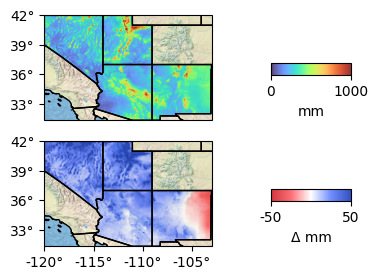

In [ ]:
import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import os
import rioxarray as xr
import cartopy.crs as ccrs
import cartopy
from matplotlib.image import imread
import matplotlib as mpl
import PIL
PIL.Image.MAX_IMAGE_PIXELS = None


accumtif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/accum_ReDataThumb_1974_CCSM4.tif'
accumdeltatif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/accum_ReDataThumb_DELTA_CCSM4.tif'
saveFILE = '/content/drive/My Drive/GEE_Downloads/Fig_ReDataThumbnail.png'

fname = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/NE1_HR_LC_SR_W_DR.tif'



fig, ax = plt.subplots(2, 1, figsize=(4, 3), subplot_kw={'projection': ccrs.PlateCarree()})
#plt.subplots_adjust(wspace=0.1, hspace=0.1, top=0.95, right=0.99)


dem = xr.open_rasterio(accumtif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -999e3, np.nan)

cmap_str = 'turbo'
cividis_r = mpl.cm.get_cmap(cmap_str)
cmap = cividis_r


ax[0].set_yticks([33, 36, 39, 42], crs=ccrs.PlateCarree())
ax[0].set_yticklabels(['33°', '36°', '39°', '42°'], size=10)
ax[0].set_extent([-120, -102.991, 31.333, 42.008])
ax[0].add_feature(cartopy.feature.STATES, linewidth=1)
ax[0].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
im = ax[0].imshow(dem,
            extent=[lon_min, lon_max, lat_min, lat_max],
            origin='upper',
            vmin=0,
            vmax=1000,
            alpha=0.80,
            cmap=cmap)

cax = fig.add_axes([0.87, 0.68, 0.2, 0.04]) #[X, Y, WIDTH, HEIGHT]
cbar = fig.colorbar(im, cax=cax, orientation='horizontal', label='mm')
cbar.set_ticks([0, 1000])
cbar.set_ticklabels(['0', '1000'], size=10)






dem = xr.open_rasterio(accumdeltatif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -999e3, np.nan)

cmap = mpl.colors.LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:C7030D-25:FC4A53-50:FFFFFF-75:4C71FF-100:0025B3
    (0.000, (0.780, 0.012, 0.051)),
    (0.250, (0.988, 0.290, 0.325)),
    (0.500, (1.000, 1.000, 1.000)),
    (0.750, (0.298, 0.443, 1.000)),
    (1.000, (0.000, 0.145, 0.702))))

ax[1].set_yticks([33, 36, 39, 42], crs=ccrs.PlateCarree())
ax[1].set_yticklabels(['33°', '36°', '39°', '42°'], size=10)
ax[1].set_xticks([-105, -110, -115, -119.99], crs=ccrs.PlateCarree())
ax[1].set_xticklabels(['-105°', '-110°', '-115°', '-120°'], size=10)
ax[1].set_extent([-120, -102.991, 31.333, 42.008])
ax[1].add_feature(cartopy.feature.STATES, linewidth=1)
ax[1].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])
im = ax[1].imshow(dem,
            extent=[lon_min, lon_max, lat_min, lat_max],
            origin='upper',
            vmin=-50,
            vmax=50,
            alpha=0.80,
            cmap=cmap)

cax = fig.add_axes([0.87, 0.26, 0.2, 0.04]) #[X, Y, WIDTH, HEIGHT]
cbar = fig.colorbar(im, cax=cax, orientation='horizontal', label='Δ mm')
cbar.set_ticks([-50, 50])
cbar.set_ticklabels(['-50', '50'], size=10)


fig.savefig(saveFILE, dpi=70, bbox_inches = 'tight')#bbox_inches='tight'

